##### 산단테르 은행 고객 만족 예측
- data 
- target =0: 불만 x/ 1:불만 o
- 과연 data의 어떤 피처가 고객의 불만을 가져왔을까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#전처리
df = pd.read_csv('04/santander/train.csv', encoding = 'latin-1')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
df.shape

(76020, 371)

In [4]:
df.info() #결측값x, 전부 숫자형 칼럼.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
#불균형 데이터인지? ->불균형함.
print(df['TARGET'].value_counts())

#불균형 비율은?
unsatisfied =df[df['TARGET']==1]['TARGET'].count()
total = df['TARGET'].count()
print('불균형 비율은 : {0:.3f}'.format(unsatisfied/total)) #굉장히 불균형 데이터.

0    73012
1     3008
Name: TARGET, dtype: int64
불균형 비율은 : 0.040


In [6]:
df.describe() #var3의 min이 -999999

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
df.var3.value_counts() #-999999(결측값인 것으로 예상됨)는 너무 편차가 심하므로 가장 다수의 값인 2로 변경.

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 17            7
 23            7
 25            6
 142           6
 154           6
 20            6
 31            6
 38            6
 153           5
 24            5
 91            5
           ...  
 225           1
 169           1
 41            1
 228           1
 101           1
 165           1
 229           1
 168           1
 108           1
 238           1
 184           1
 112           1
 76            1
 77            1
 205           1
 119           1
 79            1
 182           1
 181           1
 210           1
 40            1
 211           1
 84            1
 213           1
 178           1
 177           1
 87            1
 151          

In [8]:
#var3칼럼 replace
df['var3']=df['var3'].replace(-999999,2)
#ID칼럼 드롭
df.drop('ID',axis=1,inplace=True)

- 머신러닝 시작!

In [9]:
#data/target 분리
y_df = df['TARGET']
X_df = df.drop('TARGET',axis=1)

In [10]:
print(X_df.shape)
print(y_df.shape)

(76020, 369)
(76020,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#여기서 중요한 것은 우리가 지금 캐글에서 주어진 train셋만 대상으로 하고 있다는 것!(test셋은 'target' 피처가 없음. 즉 정답이 나와있지 않아서 이것은 사용 불가능)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.2, random_state=0)

#train셋에서의 1의 비율과 test셋에서의 1의 비율이 같은가?
train_count = y_train.count()
test_count = y_test.count()
#전체 train, test shape
print('트레인셋 shape:{0}, 테스트셋 shape:{1}'.format(X_train.shape, X_test.shape))

#비율
#print(y_train.value_counts())
#print(y_test.value_counts())
print(y_train.value_counts()/train_count)
print(y_test.value_counts()/test_count) #비율을 보면 1 비율이 비슷하게 잘 split됨.

트레인셋 shape:(60816, 369), 테스트셋 shape:(15204, 369)
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


##### xgb 모델로 분류해보기! + 하이퍼 파라미터 튜닝

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [14]:
#객체
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
#학습(조기중단도 함께!)
evals = [(X_train, y_train), (X_test, y_test)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 50, eval_metric="auc", eval_set=evals)

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15]

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=156, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [15]:
#예측(안하는것이, .predict 메서드가 아니라 .predict_proba로 확률을 가져올 것임--roc, auc 구할 때는 이런 방법을 쓸 수도 있음.)
#https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

#평가
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro') #macro는 단순 평균을 의미
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8419


- 하이퍼 파라미터 튜닝 with gridsearchcv #1
- (참고) 원래 이렇게 시간이 오래 걸리고 파라미터 개수가 많은 경우에는 파라미터를 작게 해서 돌려 보고 최적의 값을 찾은 후에, 거기다 새로운 파라미터들을 추가해서 또 돌려보는 식으로 진행한다.

In [18]:
#시간이 오래 걸리므로 n_estimators=100, early_stopping_rounds=30으로 줄일 것임.

#객체
xgb_clf = XGBClassifier(n_estimators=100, random_state=156)
#하이퍼 파라미터 튜닝을 위한 파라미터 설정
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

In [19]:
#그리드서치
grid_cv = GridSearchCV(xgb_clf, params)
#학습-조기중단 함께
evals = [(X_train, y_train), (X_test, y_test)]
grid_cv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric='auc', eval_set=evals)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.808554	validation_1-auc:0.808312
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813657	validation_1-auc:0.813928
[2]	validation_0-auc:0.803792	validation_1-auc:0.811241
[3]	validation_0-auc:0.818096	validation_1-auc:0.819606
[4]	validation_0-auc:0.822702	validation_1-auc:0.824675
[5]	validation_0-auc:0.811539	validation_1-auc:0.815633
[6]	validation_0-auc:0.824338	validation_1-auc:0.823532
[7]	validation_0-auc:0.829846	validation_1-auc:0.827617
[8]	validation_0-auc:0.834344	validation_1-auc:0.83134
[9]	validation_0-auc:0.835085	validation_1-auc:0.83107
[10]	validation_0-auc:0.833186	validation_1-auc:0.83048
[11]	validation_0-auc:0.831297	validation_1-auc:0.82955
[12]	validation_0-auc:0.826303	validation_1-auc:0.825655
[13]	validation_0-auc:0.831857	validation_1-auc:0.829394
[14]	validation_0-auc:0.834814	validation_1-auc:0.831087
[1

[45]	validation_0-auc:0.858568	validation_1-auc:0.841122
[46]	validation_0-auc:0.860026	validation_1-auc:0.841838
[47]	validation_0-auc:0.860355	validation_1-auc:0.841527
[48]	validation_0-auc:0.861291	validation_1-auc:0.841935
[49]	validation_0-auc:0.86166	validation_1-auc:0.841669
[50]	validation_0-auc:0.861702	validation_1-auc:0.841583
[51]	validation_0-auc:0.862596	validation_1-auc:0.84191
[52]	validation_0-auc:0.862913	validation_1-auc:0.841934
[53]	validation_0-auc:0.863677	validation_1-auc:0.842487
[54]	validation_0-auc:0.864028	validation_1-auc:0.842349
[55]	validation_0-auc:0.864107	validation_1-auc:0.842293
[56]	validation_0-auc:0.864762	validation_1-auc:0.842252
[57]	validation_0-auc:0.865307	validation_1-auc:0.842601
[58]	validation_0-auc:0.865617	validation_1-auc:0.842531
[59]	validation_0-auc:0.866297	validation_1-auc:0.842901
[60]	validation_0-auc:0.866585	validation_1-auc:0.842789
[61]	validation_0-auc:0.867089	validation_1-auc:0.843107
[62]	validation_0-auc:0.867503	va

[87]	validation_0-auc:0.873445	validation_1-auc:0.843376
[88]	validation_0-auc:0.873533	validation_1-auc:0.843415
[89]	validation_0-auc:0.873761	validation_1-auc:0.843292
[90]	validation_0-auc:0.873993	validation_1-auc:0.843254
[91]	validation_0-auc:0.874272	validation_1-auc:0.843606
[92]	validation_0-auc:0.874419	validation_1-auc:0.843743
[93]	validation_0-auc:0.874706	validation_1-auc:0.843533
[94]	validation_0-auc:0.874802	validation_1-auc:0.843421
[95]	validation_0-auc:0.874957	validation_1-auc:0.843425
[96]	validation_0-auc:0.874964	validation_1-auc:0.843397
[97]	validation_0-auc:0.875125	validation_1-auc:0.843383
[98]	validation_0-auc:0.875485	validation_1-auc:0.843254
[99]	validation_0-auc:0.875662	validation_1-auc:0.8433
[0]	validation_0-auc:0.808101	validation_1-auc:0.808267
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813462	validation_1-auc:0

[32]	validation_0-auc:0.846795	validation_1-auc:0.839129
[33]	validation_0-auc:0.848244	validation_1-auc:0.840313
[34]	validation_0-auc:0.847931	validation_1-auc:0.839574
[35]	validation_0-auc:0.849914	validation_1-auc:0.840769
[36]	validation_0-auc:0.849907	validation_1-auc:0.840293
[37]	validation_0-auc:0.851085	validation_1-auc:0.840687
[38]	validation_0-auc:0.851582	validation_1-auc:0.84083
[39]	validation_0-auc:0.85177	validation_1-auc:0.841093
[40]	validation_0-auc:0.852486	validation_1-auc:0.840955
[41]	validation_0-auc:0.854063	validation_1-auc:0.842212
[42]	validation_0-auc:0.854353	validation_1-auc:0.841714
[43]	validation_0-auc:0.854155	validation_1-auc:0.841702
[44]	validation_0-auc:0.854375	validation_1-auc:0.841433
[45]	validation_0-auc:0.855952	validation_1-auc:0.842442
[46]	validation_0-auc:0.857014	validation_1-auc:0.843431
[47]	validation_0-auc:0.857296	validation_1-auc:0.843102
[48]	validation_0-auc:0.858496	validation_1-auc:0.843969
[49]	validation_0-auc:0.858622	va

[74]	validation_0-auc:0.866665	validation_1-auc:0.843663
[75]	validation_0-auc:0.866994	validation_1-auc:0.843566
[76]	validation_0-auc:0.867055	validation_1-auc:0.843617
[77]	validation_0-auc:0.867314	validation_1-auc:0.843637
[78]	validation_0-auc:0.867629	validation_1-auc:0.84348
[79]	validation_0-auc:0.867984	validation_1-auc:0.843312
[80]	validation_0-auc:0.868396	validation_1-auc:0.843255
[81]	validation_0-auc:0.86873	validation_1-auc:0.843125
[82]	validation_0-auc:0.868961	validation_1-auc:0.843351
[83]	validation_0-auc:0.869261	validation_1-auc:0.843412
[84]	validation_0-auc:0.869444	validation_1-auc:0.843435
[85]	validation_0-auc:0.869496	validation_1-auc:0.843398
[86]	validation_0-auc:0.869898	validation_1-auc:0.843634
[87]	validation_0-auc:0.869967	validation_1-auc:0.843545
[88]	validation_0-auc:0.870039	validation_1-auc:0.843569
[89]	validation_0-auc:0.870489	validation_1-auc:0.843733
[90]	validation_0-auc:0.870667	validation_1-auc:0.843671
[91]	validation_0-auc:0.871086	va

[63]	validation_0-auc:0.889223	validation_1-auc:0.844868
[64]	validation_0-auc:0.889369	validation_1-auc:0.844809
[65]	validation_0-auc:0.889835	validation_1-auc:0.844921
[66]	validation_0-auc:0.889919	validation_1-auc:0.844984
[67]	validation_0-auc:0.890678	validation_1-auc:0.844652
[68]	validation_0-auc:0.891178	validation_1-auc:0.844562
[69]	validation_0-auc:0.891302	validation_1-auc:0.844452
[70]	validation_0-auc:0.891644	validation_1-auc:0.844188
[71]	validation_0-auc:0.891934	validation_1-auc:0.844381
[72]	validation_0-auc:0.892143	validation_1-auc:0.844231
[73]	validation_0-auc:0.892207	validation_1-auc:0.84437
[74]	validation_0-auc:0.892719	validation_1-auc:0.844077
[75]	validation_0-auc:0.893375	validation_1-auc:0.844058
[76]	validation_0-auc:0.89348	validation_1-auc:0.844002
[77]	validation_0-auc:0.893677	validation_1-auc:0.844162
[78]	validation_0-auc:0.893885	validation_1-auc:0.844346
[79]	validation_0-auc:0.894287	validation_1-auc:0.844176
[80]	validation_0-auc:0.894573	va

[19]	validation_0-auc:0.84973	validation_1-auc:0.836195
[20]	validation_0-auc:0.849039	validation_1-auc:0.834456
[21]	validation_0-auc:0.848608	validation_1-auc:0.832883
[22]	validation_0-auc:0.849	validation_1-auc:0.832639
[23]	validation_0-auc:0.84849	validation_1-auc:0.831433
[24]	validation_0-auc:0.851087	validation_1-auc:0.832939
[25]	validation_0-auc:0.853212	validation_1-auc:0.834902
[26]	validation_0-auc:0.854845	validation_1-auc:0.836765
[27]	validation_0-auc:0.855342	validation_1-auc:0.835158
[28]	validation_0-auc:0.855154	validation_1-auc:0.834747
[29]	validation_0-auc:0.855182	validation_1-auc:0.834193
[30]	validation_0-auc:0.857554	validation_1-auc:0.835466
[31]	validation_0-auc:0.859369	validation_1-auc:0.836702
[32]	validation_0-auc:0.859008	validation_1-auc:0.835996
[33]	validation_0-auc:0.860783	validation_1-auc:0.836944
[34]	validation_0-auc:0.860995	validation_1-auc:0.835305
[35]	validation_0-auc:0.863004	validation_1-auc:0.8361
[36]	validation_0-auc:0.862889	validat

[67]	validation_0-auc:0.881953	validation_1-auc:0.845679
[68]	validation_0-auc:0.882632	validation_1-auc:0.845834
[69]	validation_0-auc:0.882677	validation_1-auc:0.8458
[70]	validation_0-auc:0.882867	validation_1-auc:0.845751
[71]	validation_0-auc:0.883212	validation_1-auc:0.84572
[72]	validation_0-auc:0.883374	validation_1-auc:0.845871
[73]	validation_0-auc:0.883465	validation_1-auc:0.845631
[74]	validation_0-auc:0.883952	validation_1-auc:0.845356
[75]	validation_0-auc:0.884963	validation_1-auc:0.845197
[76]	validation_0-auc:0.885132	validation_1-auc:0.845241
[77]	validation_0-auc:0.885156	validation_1-auc:0.845493
[78]	validation_0-auc:0.885471	validation_1-auc:0.845648
[79]	validation_0-auc:0.885618	validation_1-auc:0.845785
[80]	validation_0-auc:0.885941	validation_1-auc:0.845236
[81]	validation_0-auc:0.886342	validation_1-auc:0.845184
[82]	validation_0-auc:0.886517	validation_1-auc:0.845348
[83]	validation_0-auc:0.88668	validation_1-auc:0.845321
[84]	validation_0-auc:0.886794	vali

[13]	validation_0-auc:0.83741	validation_1-auc:0.83276
[14]	validation_0-auc:0.838738	validation_1-auc:0.833401
[15]	validation_0-auc:0.838441	validation_1-auc:0.833128
[16]	validation_0-auc:0.839832	validation_1-auc:0.83441
[17]	validation_0-auc:0.840669	validation_1-auc:0.83537
[18]	validation_0-auc:0.842223	validation_1-auc:0.835633
[19]	validation_0-auc:0.843561	validation_1-auc:0.836455
[20]	validation_0-auc:0.844291	validation_1-auc:0.837002
[21]	validation_0-auc:0.844897	validation_1-auc:0.837146
[22]	validation_0-auc:0.846054	validation_1-auc:0.838482
[23]	validation_0-auc:0.847141	validation_1-auc:0.838851
[24]	validation_0-auc:0.848061	validation_1-auc:0.838427
[25]	validation_0-auc:0.848599	validation_1-auc:0.839357
[26]	validation_0-auc:0.848958	validation_1-auc:0.839673
[27]	validation_0-auc:0.849483	validation_1-auc:0.840625
[28]	validation_0-auc:0.849889	validation_1-auc:0.840673
[29]	validation_0-auc:0.85072	validation_1-auc:0.840657
[30]	validation_0-auc:0.851528	valid

[13]	validation_0-auc:0.839009	validation_1-auc:0.829359
[14]	validation_0-auc:0.84123	validation_1-auc:0.832031
[15]	validation_0-auc:0.841047	validation_1-auc:0.832464
[16]	validation_0-auc:0.843267	validation_1-auc:0.834279
[17]	validation_0-auc:0.844124	validation_1-auc:0.835336
[18]	validation_0-auc:0.845543	validation_1-auc:0.836325
[19]	validation_0-auc:0.846669	validation_1-auc:0.837429
[20]	validation_0-auc:0.847662	validation_1-auc:0.837858
[21]	validation_0-auc:0.848355	validation_1-auc:0.83872
[22]	validation_0-auc:0.848958	validation_1-auc:0.838813
[23]	validation_0-auc:0.849472	validation_1-auc:0.839212
[24]	validation_0-auc:0.850251	validation_1-auc:0.839594
[25]	validation_0-auc:0.85075	validation_1-auc:0.839661
[26]	validation_0-auc:0.851696	validation_1-auc:0.839797
[27]	validation_0-auc:0.852038	validation_1-auc:0.839563
[28]	validation_0-auc:0.85208	validation_1-auc:0.840324
[29]	validation_0-auc:0.853387	validation_1-auc:0.839964
[30]	validation_0-auc:0.85407	valid

[12]	validation_0-auc:0.838304	validation_1-auc:0.830916
[13]	validation_0-auc:0.839341	validation_1-auc:0.830539
[14]	validation_0-auc:0.840635	validation_1-auc:0.830984
[15]	validation_0-auc:0.840266	validation_1-auc:0.832597
[16]	validation_0-auc:0.841892	validation_1-auc:0.834607
[17]	validation_0-auc:0.843914	validation_1-auc:0.835932
[18]	validation_0-auc:0.845268	validation_1-auc:0.836458
[19]	validation_0-auc:0.846409	validation_1-auc:0.83701
[20]	validation_0-auc:0.847531	validation_1-auc:0.837278
[21]	validation_0-auc:0.848117	validation_1-auc:0.839077
[22]	validation_0-auc:0.84844	validation_1-auc:0.839138
[23]	validation_0-auc:0.848953	validation_1-auc:0.839666
[24]	validation_0-auc:0.849469	validation_1-auc:0.839734
[25]	validation_0-auc:0.850194	validation_1-auc:0.840745
[26]	validation_0-auc:0.850382	validation_1-auc:0.840968
[27]	validation_0-auc:0.85089	validation_1-auc:0.841552
[28]	validation_0-auc:0.850568	validation_1-auc:0.841623
[29]	validation_0-auc:0.851265	val

[54]	validation_0-auc:0.863588	validation_1-auc:0.843062
[55]	validation_0-auc:0.864068	validation_1-auc:0.843105
[56]	validation_0-auc:0.864193	validation_1-auc:0.843014
[57]	validation_0-auc:0.864458	validation_1-auc:0.843032
[58]	validation_0-auc:0.864841	validation_1-auc:0.843311
[59]	validation_0-auc:0.865148	validation_1-auc:0.84332
[60]	validation_0-auc:0.865201	validation_1-auc:0.843322
[61]	validation_0-auc:0.865399	validation_1-auc:0.843396
[62]	validation_0-auc:0.86563	validation_1-auc:0.843377
[63]	validation_0-auc:0.865655	validation_1-auc:0.843373
[64]	validation_0-auc:0.86583	validation_1-auc:0.843459
[65]	validation_0-auc:0.866123	validation_1-auc:0.843329
[66]	validation_0-auc:0.866284	validation_1-auc:0.843271
[67]	validation_0-auc:0.866681	validation_1-auc:0.843604
[68]	validation_0-auc:0.866806	validation_1-auc:0.843673
[69]	validation_0-auc:0.866911	validation_1-auc:0.843771
[70]	validation_0-auc:0.867391	validation_1-auc:0.843805
[71]	validation_0-auc:0.86795	vali

[39]	validation_0-auc:0.879148	validation_1-auc:0.842336
[40]	validation_0-auc:0.879697	validation_1-auc:0.842768
[41]	validation_0-auc:0.880497	validation_1-auc:0.843315
[42]	validation_0-auc:0.881467	validation_1-auc:0.842934
[43]	validation_0-auc:0.882099	validation_1-auc:0.843201
[44]	validation_0-auc:0.88268	validation_1-auc:0.843497
[45]	validation_0-auc:0.882879	validation_1-auc:0.843461
[46]	validation_0-auc:0.883436	validation_1-auc:0.843058
[47]	validation_0-auc:0.884017	validation_1-auc:0.843128
[48]	validation_0-auc:0.88449	validation_1-auc:0.843422
[49]	validation_0-auc:0.884831	validation_1-auc:0.84344
[50]	validation_0-auc:0.885265	validation_1-auc:0.843623
[51]	validation_0-auc:0.885558	validation_1-auc:0.84333
[52]	validation_0-auc:0.885818	validation_1-auc:0.843322
[53]	validation_0-auc:0.886308	validation_1-auc:0.842951
[54]	validation_0-auc:0.886723	validation_1-auc:0.842666
[55]	validation_0-auc:0.887294	validation_1-auc:0.842845
[56]	validation_0-auc:0.887563	vali

[20]	validation_0-auc:0.857384	validation_1-auc:0.839998
[21]	validation_0-auc:0.857952	validation_1-auc:0.840202
[22]	validation_0-auc:0.85941	validation_1-auc:0.840215
[23]	validation_0-auc:0.860545	validation_1-auc:0.840451
[24]	validation_0-auc:0.861215	validation_1-auc:0.840893
[25]	validation_0-auc:0.862033	validation_1-auc:0.840763
[26]	validation_0-auc:0.862453	validation_1-auc:0.841284
[27]	validation_0-auc:0.863149	validation_1-auc:0.841558
[28]	validation_0-auc:0.863049	validation_1-auc:0.841152
[29]	validation_0-auc:0.864413	validation_1-auc:0.84181
[30]	validation_0-auc:0.865516	validation_1-auc:0.841929
[31]	validation_0-auc:0.866343	validation_1-auc:0.84228
[32]	validation_0-auc:0.866522	validation_1-auc:0.841605
[33]	validation_0-auc:0.867167	validation_1-auc:0.841761
[34]	validation_0-auc:0.86758	validation_1-auc:0.841769
[35]	validation_0-auc:0.868128	validation_1-auc:0.84211
[36]	validation_0-auc:0.869055	validation_1-auc:0.842291
[37]	validation_0-auc:0.869644	valid

[10]	validation_0-auc:0.848535	validation_1-auc:0.835169
[11]	validation_0-auc:0.849219	validation_1-auc:0.83421
[12]	validation_0-auc:0.85193	validation_1-auc:0.836005
[13]	validation_0-auc:0.852652	validation_1-auc:0.836036
[14]	validation_0-auc:0.853216	validation_1-auc:0.837709
[15]	validation_0-auc:0.853622	validation_1-auc:0.837491
[16]	validation_0-auc:0.85437	validation_1-auc:0.83856
[17]	validation_0-auc:0.855649	validation_1-auc:0.839662
[18]	validation_0-auc:0.857382	validation_1-auc:0.840136
[19]	validation_0-auc:0.858727	validation_1-auc:0.839883
[20]	validation_0-auc:0.859287	validation_1-auc:0.84003
[21]	validation_0-auc:0.860961	validation_1-auc:0.839831
[22]	validation_0-auc:0.861712	validation_1-auc:0.840022
[23]	validation_0-auc:0.862593	validation_1-auc:0.839923
[24]	validation_0-auc:0.863765	validation_1-auc:0.839491
[25]	validation_0-auc:0.86461	validation_1-auc:0.839366
[26]	validation_0-auc:0.865392	validation_1-auc:0.83938
[27]	validation_0-auc:0.865761	validat

[71]	validation_0-auc:0.899553	validation_1-auc:0.842058
[72]	validation_0-auc:0.899854	validation_1-auc:0.841987
[73]	validation_0-auc:0.899916	validation_1-auc:0.84195
Stopping. Best iteration:
[43]	validation_0-auc:0.887772	validation_1-auc:0.845838



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=156, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7], 'min_child_weight': [1, 3], 'colsample_bytree': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
#cv 결과
print('최적의 파라미터는: ', grid_cv.best_params_)
#print('최적의 파라미터일 떄의 스코어는: ', grid_cv.best_score_) #필요없는 수치

최적의 파라미터는:  {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 3}
최적의 파라미터일 떄의 스코어는:  0.9610464351486451


In [21]:
#학습후, 평가 결과
xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:,1], average='macro') #평가는 앞에서의 grid_cv.predict_proba로..
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8458


- 하이퍼 파라미터 튜닝 #2
- 아까 구한 최적의 파라미터들(3개)를 추가, 여기다가 n_estimators=1000으로 높이고, learning_rate, reg_alpha(L1규제) 를 추가해보자.
- 또 조기중단도 200으로 높였다.

In [22]:
#새로운 객체
new_xgb = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, 
                       max_depth=7, min_child_weight=3, colsample_bytree=0.75, reg_alpha=0.03)
#학습
new_xgb.fit(X_train,y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=evals)

[0]	validation_0-auc:0.823078	validation_1-auc:0.816077
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.825405	validation_1-auc:0.816647
[2]	validation_0-auc:0.831749	validation_1-auc:0.821105
[3]	validation_0-auc:0.834999	validation_1-auc:0.825509
[4]	validation_0-auc:0.835619	validation_1-auc:0.826791
[5]	validation_0-auc:0.836691	validation_1-auc:0.828464
[6]	validation_0-auc:0.837399	validation_1-auc:0.827685
[7]	validation_0-auc:0.838293	validation_1-auc:0.828108
[8]	validation_0-auc:0.83898	validation_1-auc:0.827884
[9]	validation_0-auc:0.839207	validation_1-auc:0.82681
[10]	validation_0-auc:0.840556	validation_1-auc:0.828829
[11]	validation_0-auc:0.840439	validation_1-auc:0.827742
[12]	validation_0-auc:0.841134	validation_1-auc:0.827685
[13]	validation_0-auc:0.841318	validation_1-auc:0.827771
[14]	validation_0-auc:0.844923	validation_1-auc:0.83261


[141]	validation_0-auc:0.875833	validation_1-auc:0.843225
[142]	validation_0-auc:0.875894	validation_1-auc:0.843163
[143]	validation_0-auc:0.875965	validation_1-auc:0.843277
[144]	validation_0-auc:0.876104	validation_1-auc:0.843362
[145]	validation_0-auc:0.876294	validation_1-auc:0.843357
[146]	validation_0-auc:0.876528	validation_1-auc:0.843707
[147]	validation_0-auc:0.876572	validation_1-auc:0.843729
[148]	validation_0-auc:0.876586	validation_1-auc:0.843775
[149]	validation_0-auc:0.876605	validation_1-auc:0.843688
[150]	validation_0-auc:0.87677	validation_1-auc:0.843593
[151]	validation_0-auc:0.876847	validation_1-auc:0.84367
[152]	validation_0-auc:0.877017	validation_1-auc:0.843731
[153]	validation_0-auc:0.877045	validation_1-auc:0.843808
[154]	validation_0-auc:0.877343	validation_1-auc:0.843939
[155]	validation_0-auc:0.877409	validation_1-auc:0.843885
[156]	validation_0-auc:0.877816	validation_1-auc:0.843946
[157]	validation_0-auc:0.878159	validation_1-auc:0.843998
[158]	validation

[283]	validation_0-auc:0.896245	validation_1-auc:0.844504
[284]	validation_0-auc:0.896277	validation_1-auc:0.844514
[285]	validation_0-auc:0.896315	validation_1-auc:0.844469
[286]	validation_0-auc:0.89637	validation_1-auc:0.84443
[287]	validation_0-auc:0.896518	validation_1-auc:0.844371
[288]	validation_0-auc:0.896572	validation_1-auc:0.844389
[289]	validation_0-auc:0.896682	validation_1-auc:0.84444
[290]	validation_0-auc:0.896777	validation_1-auc:0.844373
[291]	validation_0-auc:0.896799	validation_1-auc:0.844354
[292]	validation_0-auc:0.896842	validation_1-auc:0.844346
[293]	validation_0-auc:0.896873	validation_1-auc:0.844358
[294]	validation_0-auc:0.896947	validation_1-auc:0.844326
[295]	validation_0-auc:0.896981	validation_1-auc:0.844276
[296]	validation_0-auc:0.897063	validation_1-auc:0.844265
[297]	validation_0-auc:0.89716	validation_1-auc:0.844268
[298]	validation_0-auc:0.89721	validation_1-auc:0.844283
[299]	validation_0-auc:0.897246	validation_1-auc:0.844257
[300]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.75, gamma=0,
       learning_rate=0.02, max_delta_step=0, max_depth=7,
       min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=156,
       reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [24]:
#평가 결과
new_roc_score = roc_auc_score(y_test, new_xgb.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(new_roc_score))

ROC AUC: 0.8458


###### plot_importance() +시각화

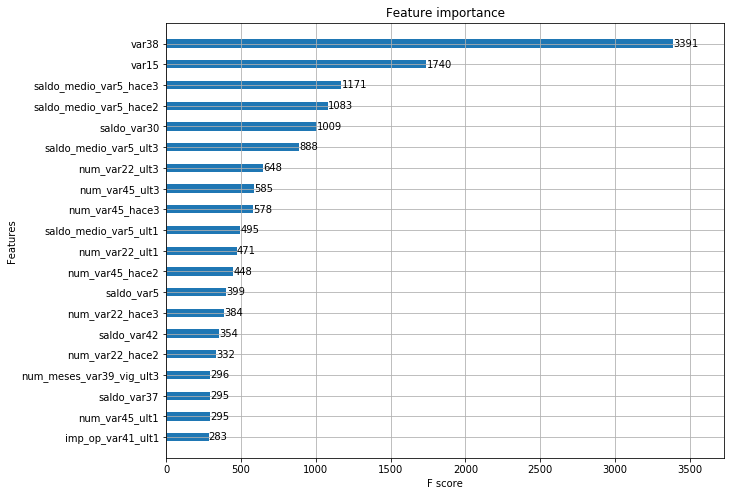

In [29]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(10,8)) #앞의 1,1은 딱 1개 그림을 집어넣는다는 뜻(matrix로 이해)-만약 2,2면 총 4개
plot_importance(new_xgb, ax, max_num_features=20, height=0.4) #부가 옵션:max_num_features는 최대 20개 피처만, height

##### lightGBM 모델로 분류해보기! + 하이퍼 파라미터 튜닝
- 앞의 xgb로 했을 때보다 더 속도가 빠름

In [30]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
#객체
lgbm_clf = LGBMClassifier(n_estimators=500, random_state=156)
#학습
evals =[(X_test, y_test)]  #이거 [(X_train, y_train),(X_test, y_test)] 로 쓰면? -->결과 동일!(근데 보기에는 test만 쓰는게 더 복잡하지 않아서ㅎㅎ)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
        random_state=156, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
#예측 및 평가
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8396


- 하이퍼 파라미터 튜닝

In [40]:
#객체(하이퍼 파라미터 테스트 수행 속도 향상을 위해 n_estimators=200으로 감소)
LGBM_clf = LGBMClassifier(n_estimaotrs=200, random_state=156)
#파라미터
params = {'num_leaves':[32, 64], 'max_depth':[128, 160], 'min_child_samples':[60,100], 'subsample':[0.8,1]}
#그리드서치
gridcv = GridSearchCV(LGBM_clf, params)
#학습
evals = [(X_train, y_train),(X_test, y_test)] #이거 [(X_test, y_test)] 로 쓰면? 같은 결과지만 test셋만 넣었을 때가 더 간결
gridcv.fit(X_train, y_train, early_stopping_rounds =30, eval_metric="auc", eval_set = evals)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 0.878765	valid_0's binary_logloss: 0.122704	valid_1's auc: 0.838946	valid_1's binary_logloss: 0.139572
[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.13952
[39]	valid_0's auc: 0.88098	valid_0's binary_logloss: 0.12178	valid_1's auc: 0.838929	valid_1's binary_logloss: 0.139584
[40]	valid_0's auc: 0

[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 0.884201	valid_0's binary_logloss: 0.120532	valid_1's auc: 0.839839	valid_1's binary_logloss: 0.139368
[48]	valid_0's auc: 0.884428	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.839815	valid_1's binary_logloss: 0.139368
[49]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.83995	valid_1's binary_logloss: 0.139355
[50]	valid_0's auc:

[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc: 0.863324	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.838024	valid_1's binary_logloss: 0.140911
[19]	valid_0's auc: 0.864682	valid_0's binary_logloss: 0.128016	valid_1's auc: 0.838411	valid_1's binary_logloss: 0.140669
[20]	valid_0's auc: 0.865346	valid_0's binary_logloss: 0.127585	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.140498
[21]	valid_0's auc: 0.8665	valid_0's binary_logloss: 0.127103	valid_1's auc: 0.83851	valid_1's binary_logloss: 0.140294
[22]	valid_0's auc: 0.867889	valid_0's binary_logloss: 0.126657	valid_1's auc: 0.839074	valid_1's binary_logloss: 0.140136
[23]	valid_0's auc: 

[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc: 0.871191	valid_0's binary_logloss: 0.125319	valid_1's auc: 0.839924	valid_1's binary_logloss: 0.139651
[28]	valid_0's auc: 0.871788	valid_0's binary_logloss: 0.125064	valid_1's auc: 0.839647	valid_1's binary_logloss: 0.139574
[29]	valid_0's auc: 0.872714	valid_0's binary_logloss: 0.124726	valid_1's auc: 0.840154	valid_1's binary_logloss: 0.139481
[30]	valid_0's auc: 0.873746	valid_0's binary_logloss: 0.124416	valid_1's auc: 0.839602	valid_1's binary_logloss: 0.139497
[31]	valid_0's auc: 0.874715	valid_0's binary_logloss: 0.124154	valid_1's auc: 0.839072	valid_1's binary_logloss: 0.139568
[32]	valid_0's auc: 0.875774	valid_0's binary_logloss: 0.123879	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.139579
[33]	valid_0's a

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc: 0.890614	valid_0's binary_logloss: 0.118542	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.14008
[30]	valid_0's auc: 0.891023	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.83748	valid_1's binary_logloss: 0.140051
[31]	valid_0's auc: 

[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.879554	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.836497	valid_1's binary_logloss: 0.140787
[19]	valid_0's auc: 0.880715	valid_0's binary_logloss: 0.123405	valid_1's auc: 0.837087	valid_1's binary_logloss: 0.140481
[20]	valid_0's auc: 0.8

[34]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.836404	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc: 0.896701	valid_0's binary_logloss: 0.115673	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.139954
[38]	valid_0's auc: 0.897344	valid_0's binary_logloss: 0.115335	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.140026
[39]	valid_0's auc: 0.897605	valid_0's binary_logloss: 0.115043	valid_1's auc: 0.836359	valid_1's binary_logloss: 0.140104
[40]	valid_0's auc: 0.898073	valid_0's binary_logloss: 0.114754	valid_1's auc: 0.836432	valid_1's binary_logloss: 0.140096
[41]	valid_0's auc: 0.898701	valid_0's binary_logloss: 0.114389	valid_1's auc: 0.836355	valid_1's binary_logloss: 0.140115
[42]	valid_0's a

[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 0.865788	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139856
[24]	valid_0's auc: 0.866662	valid_0's binary_logloss: 0.126815	valid_1's auc: 0.837785	valid_1's binary_logloss: 0.139755
[25]	valid_0's auc: 0.867441	valid_0's binary_logloss: 0.126498	valid_1's auc: 0.838008	valid_1's binary_logloss: 0.139673
[26]	valid_0's auc: 0.86805	valid_0's binary_logloss: 0.126176	valid_1's auc: 0.838301	valid_1's binary_logloss: 0.139585
[27]	valid_0's auc: 0.868525	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.139564
[28]	valid_0's auc: 0.869107	valid_0's binary_logloss: 0.125656	valid_1's auc: 0.838221	valid_1's binary_logloss: 0.139481
[29]	valid_0's auc

[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc: 0.881689	valid_0's binary_logloss: 0.121135	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139144
[52]	valid_0's auc: 0.882122	valid_0's binary_logloss: 0.12097	valid_1's auc: 0.839978	valid_1's binary_logloss: 0.139193
[53]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.120863	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139241
[54]	valid_0's auc: 0.882575	valid_0's binary_logloss: 0.120721	valid_1's auc: 0.839521	valid_1's binary_logloss: 0.139335
[55]	valid_0's auc: 0.88311	valid_0's binary_logloss: 0.120518	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139336
[56]	valid_0's auc: 0.883389	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139326
[57]	valid_0's auc: 0.88369	valid_0's binary_logloss: 0.120248	valid_1's auc: 0.839887	valid_1's binary_logloss: 0.139321
[58]	valid_0's auc: 0

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

[31]	valid_0's auc: 0.871941	valid_0's binary_logloss: 0.125092	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139431
[32]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.124816	valid_1's auc: 0.839243	valid_1's binary_logloss: 0.139362
[33]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139288
[34]	valid_0's auc: 0.874317	valid_0's binary_logloss: 0.124327	valid_1's auc: 0.839612	valid_1's binary_logloss: 0.139266
[35]	valid_0's auc: 0.875065	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.839746	valid_1's binary_logloss: 0.139241
[36]	valid_0's auc: 0.875683	valid_0's binary_logloss: 0.123777	valid_1's auc: 0.840074	valid_1's binary_logloss: 0.139138
[37]	valid_0's auc: 0.876241	valid_0's binary_logloss: 0.123571	valid_1's auc: 0.840105	valid_1's binary_logloss: 0.139101
[38]	valid_0's auc: 0.876923	valid_0's binary_logloss: 0.123355	valid_1's auc: 0.839838	valid_1's binary_logloss: 0.139141
[39]	valid_0's a

[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's auc: 0.884175	valid_0's binary_logloss: 0.121053	valid_1's auc: 0.831077	valid_1's binary_logloss: 0.140897
[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's au

[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_log

[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's a

[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc: 0.899904	valid_0's binary_logloss: 0.114381	valid_1's auc: 0.837191	valid_1's binary_logloss: 0.139562
[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, b

[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.860428	valid_0's binary_logloss: 0.129814	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.141389
[17]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.141106
[18]	valid_0's auc: 0.86332	valid_0's binary_logloss: 0.128681	valid_1's auc: 0.836771	valid_1's binary_logloss: 0.140932
[19]	valid_0's auc: 0.864365	valid_0's binary_logloss: 0.128233	valid_1's auc: 0.836564	valid_1's binary_logloss: 0.140796
[20]	valid_0's auc: 0.865268	valid_0's binary_logloss: 0.127815	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.140715
[21]	valid_0's auc: 0.865869	valid_0's binary_logloss: 0.127427	valid_1's auc: 0.835085	valid_1's binary_logloss: 0.140641
[22]	valid_0's auc: 

[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc: 0.884968	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.139667
[49]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.83827	valid_1's binary_logloss: 0.13968
[50]	valid_0's auc: 0.885759	valid_0's binary_logloss: 0.119734	valid_1's auc: 0.838029	valid_1's binary_logloss: 0.139727
[51]	valid_0's auc: 0.886206	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.13975
[52]	valid_0's auc: 0.

[55]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.839951	valid_1's binary_logloss: 0.139433
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss

[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 

[36]	valid_0's auc: 0.878163	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139395
[37]	valid_0's auc: 0.87856	valid_0's binary_logloss: 0.122649	valid_1's auc: 0.839051	valid_1's binary_logloss: 0.139443
[38]	valid_0's auc: 0.879102	valid_0's binary_logloss: 0.122415	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139378
[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc:

[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.879554	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.836497	valid_1's binary_logloss: 0.140787
[19]	valid_0's auc: 0.8

[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc: 0.896701	valid_0's binary_logloss: 0.115673	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.139954
[38]	valid_0's auc: 0.897344	valid_0's binary_logloss: 0.115335	valid_1's auc: 0.836585	valid_1's binary_logloss: 0.140026
[39]	valid_0's auc: 0.897605	valid_0's binary_logloss: 0.115043	valid_1's auc: 0.836359	valid_1's binary_logloss: 0.140104
[40]	valid_0's auc: 0.898073	valid_0's binary_logloss: 0.114754	valid_1's auc: 0.836432	valid_1's binary_logloss: 0.140096
[41]	valid_0's auc: 0.898701	valid_0's binary_logloss: 0.114389	valid_1's auc: 0.836355	valid_1's binary_logloss: 0.140115
[42]	valid_0's auc: 0.898936	valid_0's binary_logloss: 0.114144	valid_1's auc: 0.836485	valid_1's binary_logloss: 0.14011
[43]	valid_0's au

[21]	valid_0's auc: 0.882521	valid_0's binary_logloss: 0.122301	valid_1's auc: 0.836676	valid_1's binary_logloss: 0.140236
[22]	valid_0's auc: 0.883688	valid_0's binary_logloss: 0.121776	valid_1's auc: 0.836698	valid_1's binary_logloss: 0.140127
[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 0.887311	valid_0's binary_logloss: 0.120104	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.139879
[26]	valid_0's auc: 0.888754	valid_0's binary_logloss: 0.11961	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139895
[27]	valid_0's auc: 0.889697	valid_0's binary_logloss: 0.119114	valid_1's auc: 0.836828	valid_1's binary_logloss: 0.139904
[28]	valid_0's auc: 0.891102	valid_0's binary_logloss: 0.118637	valid_1's auc: 0.83685	valid_1's binary_logloss: 0.139833
[29]	valid_0's auc: 0.

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	va

[27]	valid_0's auc: 0.868525	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.139564
[28]	valid_0's auc: 0.869107	valid_0's binary_logloss: 0.125656	valid_1's auc: 0.838221	valid_1's binary_logloss: 0.139481
[29]	valid_0's auc: 0.869754	valid_0's binary_logloss: 0.12538	valid_1's auc: 0.838255	valid_1's binary_logloss: 0.139428
[30]	valid_0's auc: 0.87056	valid_0's binary_logloss: 0.125113	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139354
[31]	valid_0's auc: 0.871162	valid_0's binary_logloss: 0.124861	valid_1's auc: 0.838979	valid_1's binary_logloss: 0.139225
[32]	valid_0's auc: 0.871762	valid_0's binary_logloss: 0.124652	valid_1's auc: 0.838753	valid_1's binary_logloss: 0.139233
[33]	valid_0's auc: 0.872722	valid_0's binary_logloss: 0.124394	valid_1's auc: 0.839239	valid_1's binary_logloss: 0.1391
[34]	valid_0's auc: 0.87368	valid_0's binary_logloss: 0.124127	valid_1's auc: 0.839489	valid_1's binary_logloss: 0.139029
[35]	valid_0's auc: 0.

[58]	valid_0's auc: 0.884025	valid_0's binary_logloss: 0.120078	valid_1's auc: 0.839684	valid_1's binary_logloss: 0.139341
[59]	valid_0's auc: 0.884477	valid_0's binary_logloss: 0.119928	valid_1's auc: 0.839523	valid_1's binary_logloss: 0.139368
[60]	valid_0's auc: 0.884659	valid_0's binary_logloss: 0.119822	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.139362
[61]	valid_0's auc: 0.885121	valid_0's binary_logloss: 0.119618	valid_1's auc: 0.839533	valid_1's binary_logloss: 0.139434
[62]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119477	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139385
[63]	valid_0's auc: 0.885487	valid_0's binary_logloss: 0.119367	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139409
[64]	valid_0's auc: 0.885645	valid_0's binary_logloss: 0.119254	valid_1's auc: 0.839603	valid_1's binary_logloss: 0.139483
[65]	valid_0's auc: 0.886	valid_0's binary_logloss: 0.119067	valid_1's auc: 0.839806	valid_1's binary_logloss: 0.139511
[66]	valid_0's auc:

[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	valid_1's binary_logloss: 0.146175
[9]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.135648	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.145198
[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.

[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc

[30]	valid_0's auc: 0.885865	valid_0's binary_logloss: 0.120366	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.140767
[31]	valid_0's auc: 0.887114	valid_0's binary_logloss: 0.11994	valid_1's auc: 0.831439	valid_1's binary_logloss: 0.140816
[32]	valid_0's auc: 0.887603	valid_0's binary_logloss: 0.119623	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.140912
[33]	valid_0's auc: 0.888164	valid_0's binary_logloss: 0.11928	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.140953
[34]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118937	valid_1's auc: 0.830222	valid_1's binary_logloss: 0.141016
[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc:

[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.860878	valid_0's binary_logloss: 0.1336	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.145179
[10]	valid_0's auc: 0.862432	valid_0's binary_logloss: 0.132438	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.144304
[11]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.131298	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143576
[12]	valid_0's auc: 0.86649	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.837121	valid_1's binary_logloss: 0.142892
[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.87

[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's auc: 0.885865	valid_0's binary_logloss: 0.120366	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.140767
[31]	valid_0's auc: 0.887114	valid_0's binary_logloss: 0.11994	valid_1's auc: 0.831439	valid_1's binary_logloss: 0.140816
[32]	valid_0's auc: 0.887603	valid_0's binary_logloss: 0.119623	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.140912
[33]	valid_0's auc: 0.888164	valid_0's binary_logloss: 0.11928	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.140953
[34]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118937	valid_1's auc: 0.830222	valid_1's binary_logloss: 0.141016
[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc:

[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	valid_1's binary_logloss: 0.146094
[9]	valid_0's auc: 0.860878	valid_0's binary_logloss: 0.1336	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.145179
[10]	valid_0's auc: 0.862432	valid_0's binary_logloss: 0.132438	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.144304
[11]	valid_0's auc: 0.864715	valid_0's binary_logloss: 0.131298	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143576
[12]	valid_0's auc: 0.86649	valid_0's binary_logloss: 0.13029	valid_1's auc: 0.837121	valid_1's binary_logloss: 0.142892
[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.8

[31]	valid_0's auc: 0.88069	valid_0's binary_logloss: 0.123148	valid_1's auc: 0.844137	valid_1's binary_logloss: 0.138484
[32]	valid_0's auc: 0.881743	valid_0's binary_logloss: 0.122823	valid_1's auc: 0.843246	valid_1's binary_logloss: 0.138591
[33]	valid_0's auc: 0.882558	valid_0's binary_logloss: 0.122542	valid_1's auc: 0.842676	valid_1's binary_logloss: 0.138654
[34]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.12228	valid_1's auc: 0.842829	valid_1's binary_logloss: 0.138612
[35]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.842651	valid_1's binary_logloss: 0.138595
[36]	valid_0's auc: 0.885075	valid_0's binary_logloss: 0.121697	valid_1's auc: 0.842554	valid_1's binary_logloss: 0.138593
[37]	valid_0's auc: 0.885953	valid_0's binary_logloss: 0.121404	valid_1's auc: 0.842654	valid_1's binary_logloss: 0.138558
[38]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.121133	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.138548
[39]	valid_0's auc:

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimaotrs=200, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=156, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'num_leaves': [32, 64], 'max_depth': [128, 160], 'min_child_samples': [60, 100], 'subsample': [0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
#cv 결과
print('최적의 파라미터: ', gridcv.best_params_)
#예측후 평가
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

최적의 파라미터:  {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC : 0.8442


- 위에서 찾은 최적의 파라미터를 적용, n_estimators와 early_stopping_rounds 도 늘려서 다시 한번 최종 결과를 확인!

In [42]:
#객체
final = LGBMClassifier(n_estimators= 1000, random_state=156,
                       max_depth=128, min_child_samples=100, num_leaves=32, subsample=0.8)
#학습
evals = [(X_test, y_test)] #이거 [(X_train, y_train),(X_test, y_test)] 로 쓰면?
final.fit(X_train, y_train, early_stopping_rounds =100, eval_metric="auc", eval_set = evals, verbose=True)

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=128,
        min_child_samples=100, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
        random_state=156, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [43]:
#평가
roc_score = roc_auc_score(y_test, final.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(roc_score))

ROC AUC: 0.8442
